*Eduardus Tjitrahardja | @edutjie | 2022*

# Types of Hierarchical Clustering

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

In [14]:
plt.style.use("seaborn")

## Loading Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/US_violent_crime.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.shape

(50, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Checking Missing Values

In [12]:
df.isnull().any()

Unnamed: 0    False
Murder        False
Assault       False
UrbanPop      False
Rape          False
dtype: bool

No missing values!

In [13]:
df.rename(columns={"Unnamed: 0": "States"}, inplace=True)
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## EDA

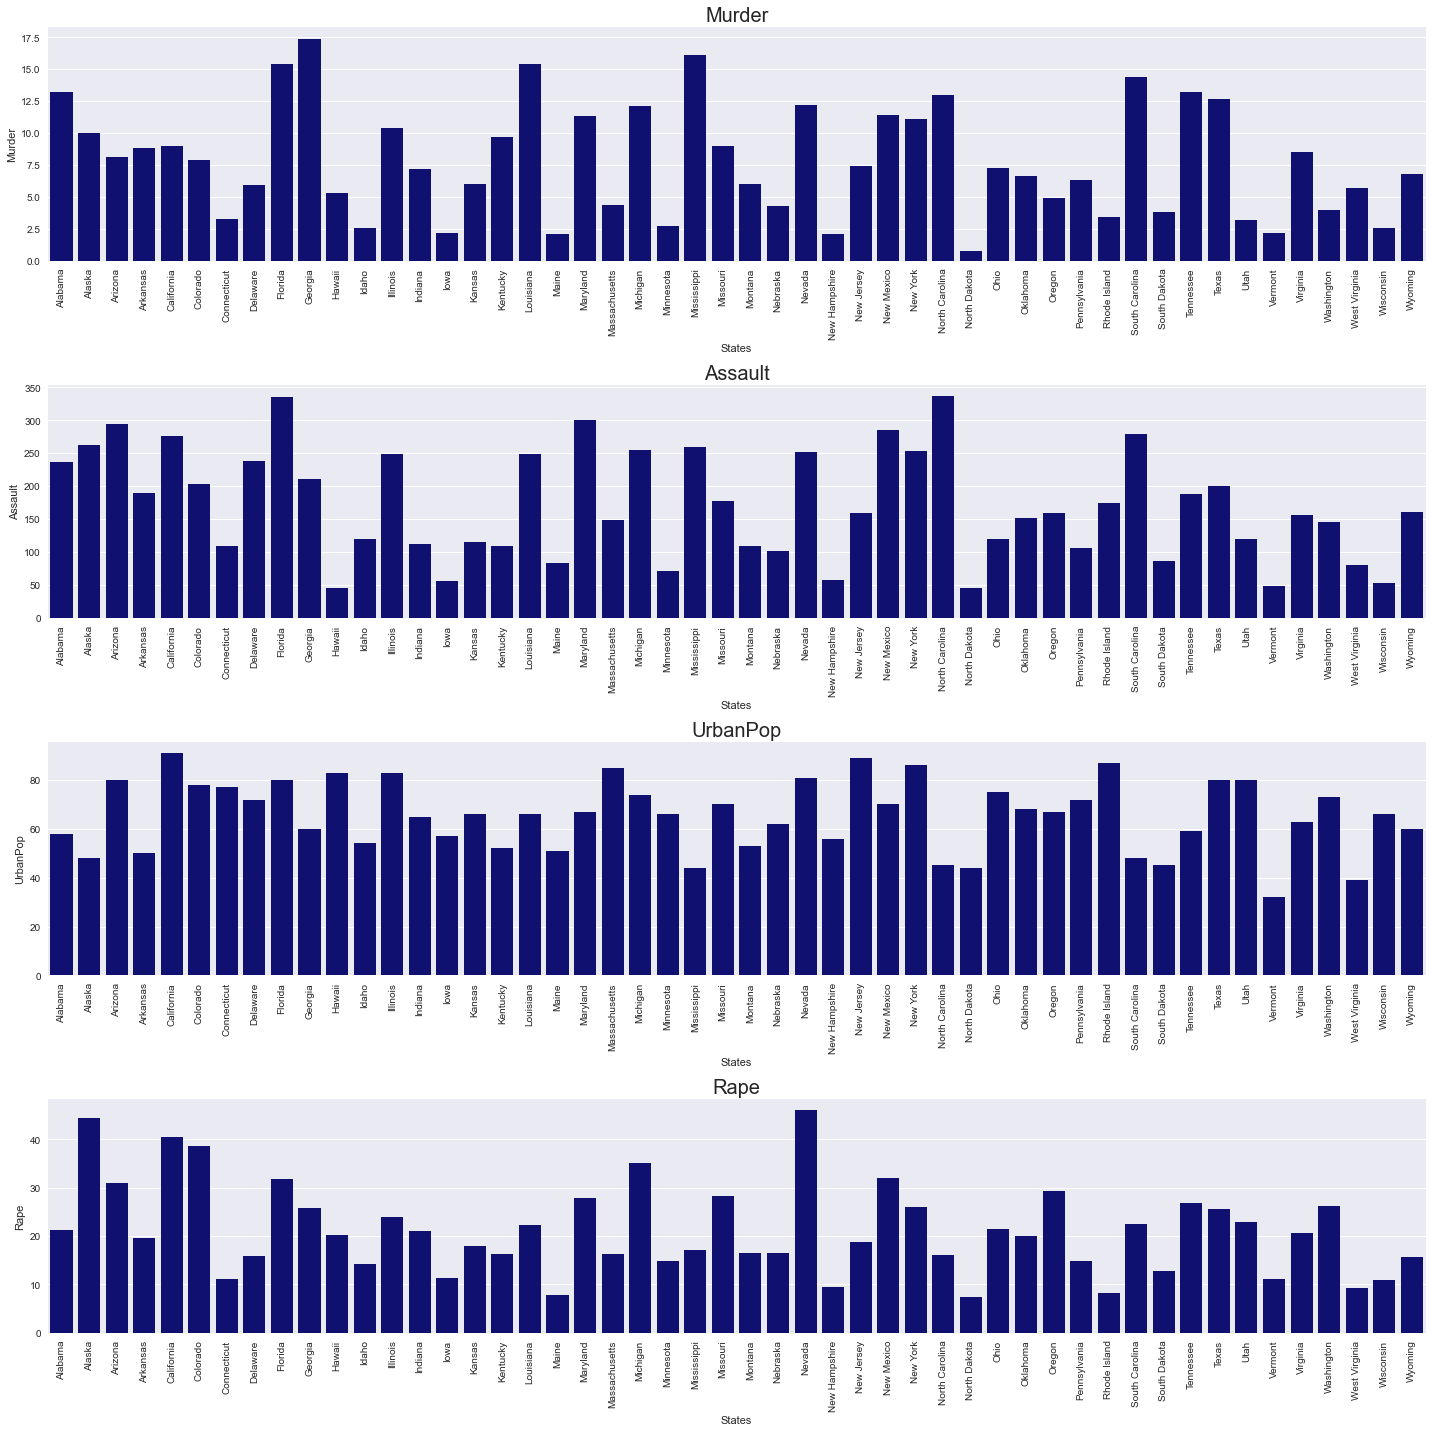

In [55]:
fig, ax = plt.subplots(4, 1, figsize=(20, 20))


for i, col in enumerate(df.drop('States', axis=1).columns):
    # df.groupby('States')[col].max().plot(kind='bar', ax=ax[i])
    sns.barplot(x='States', y=col, data=df, ax=ax[i], color='navy')
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].title.set_text(col)
    ax[i].title.set_fontsize(20)
fig.tight_layout()
plt.show()

**Observations:**
- Murder:
  - Highest Murder Rate : Georgia and Missisippi
  - Lowest Murder Rate : Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.
- Assault Rate:
  - Highest Assualt Rate : Florida and North California.
  - Lowest Assualt Rate : Hawaii, North Dakota, Vermont , New Hampshire and Wisconsin.
- UrbanPop: Percent Urban Population
  - Highest UrbanPop : California
  - Lowest UrbanPop : Vermont
- Rape Rate:
  - Highest UrbanPop Rate : Nevada and Alaska.
  - Lowest UrbanPop Rate : Maine, North Dakota,Vermont,Connecticut,New Hampshire, Wisconsin,Rhode Island and West Virginia

## Data Preprocessing

In [56]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [57]:
ss = StandardScaler()

In [59]:
df_scaled = pd.DataFrame(ss.fit_transform(df[num_cols]), columns=num_cols, index=df.index)
df_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## Types of Linkages

### 1. Single Linkage
The distance between 2 clusters is defined as the shortest distance between points in the two clusters

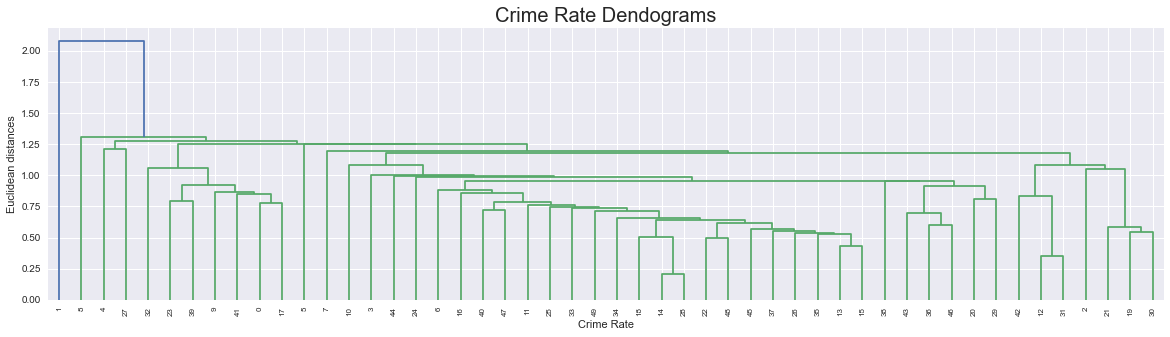

In [60]:
plt.figure(figsize=(20,5))
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.title("Crime Rate Dendograms")
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters.

### 2. Complete Linkage
The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

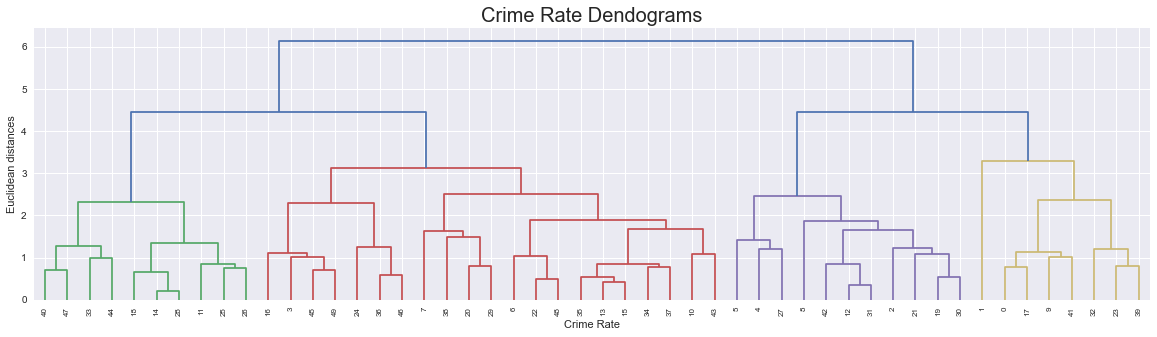

In [63]:
plt.figure(figsize=(20,5))
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.title("Crime Rate Dendograms")
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

### 3. Average Linkage
The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.

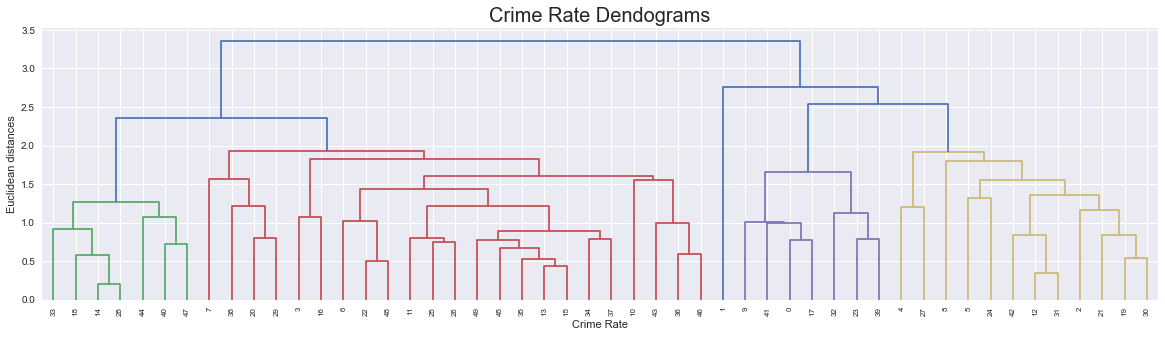

In [64]:
plt.figure(figsize=(20,5))
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.title("Crime Rate Dendograms")
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have a proper tree-like structure.

### 4. Ward Method

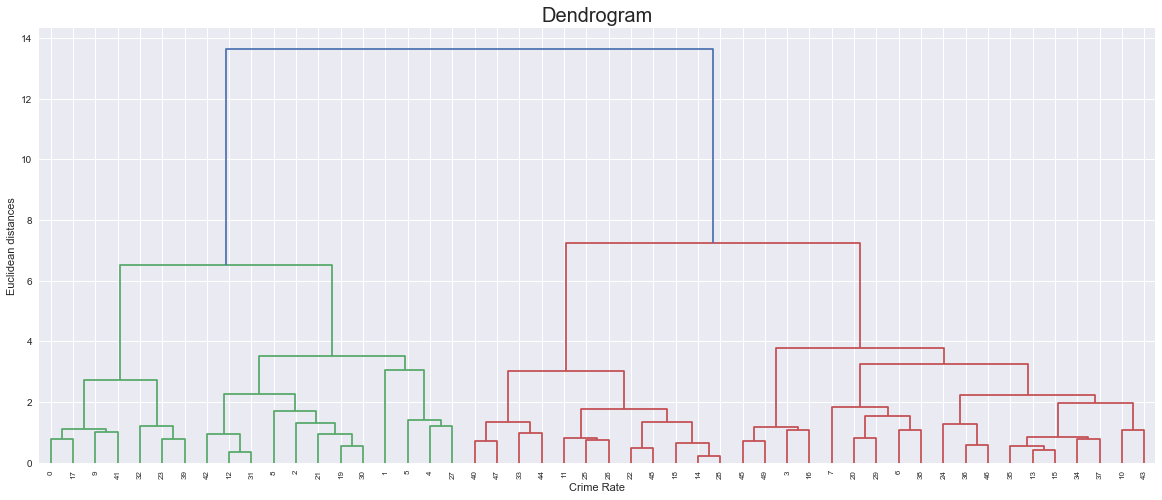

In [69]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

## Determining The Optimal Number of Clusters from this Diagram

Look at the Ward Method's dendrogram, look for the largest distance that we can vertically without crossing any horizontal line and this one is the red framed line on the above diagram. Let’s count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 2 for this dataset.

In [70]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

**Ward Method:** It is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [71]:
y_pred = ac.fit_predict(df_scaled)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
df['Cluster'] = y_pred
df[['States', 'Cluster']].head()

,States,Cluster
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1


### Plotting Clustered Dataset

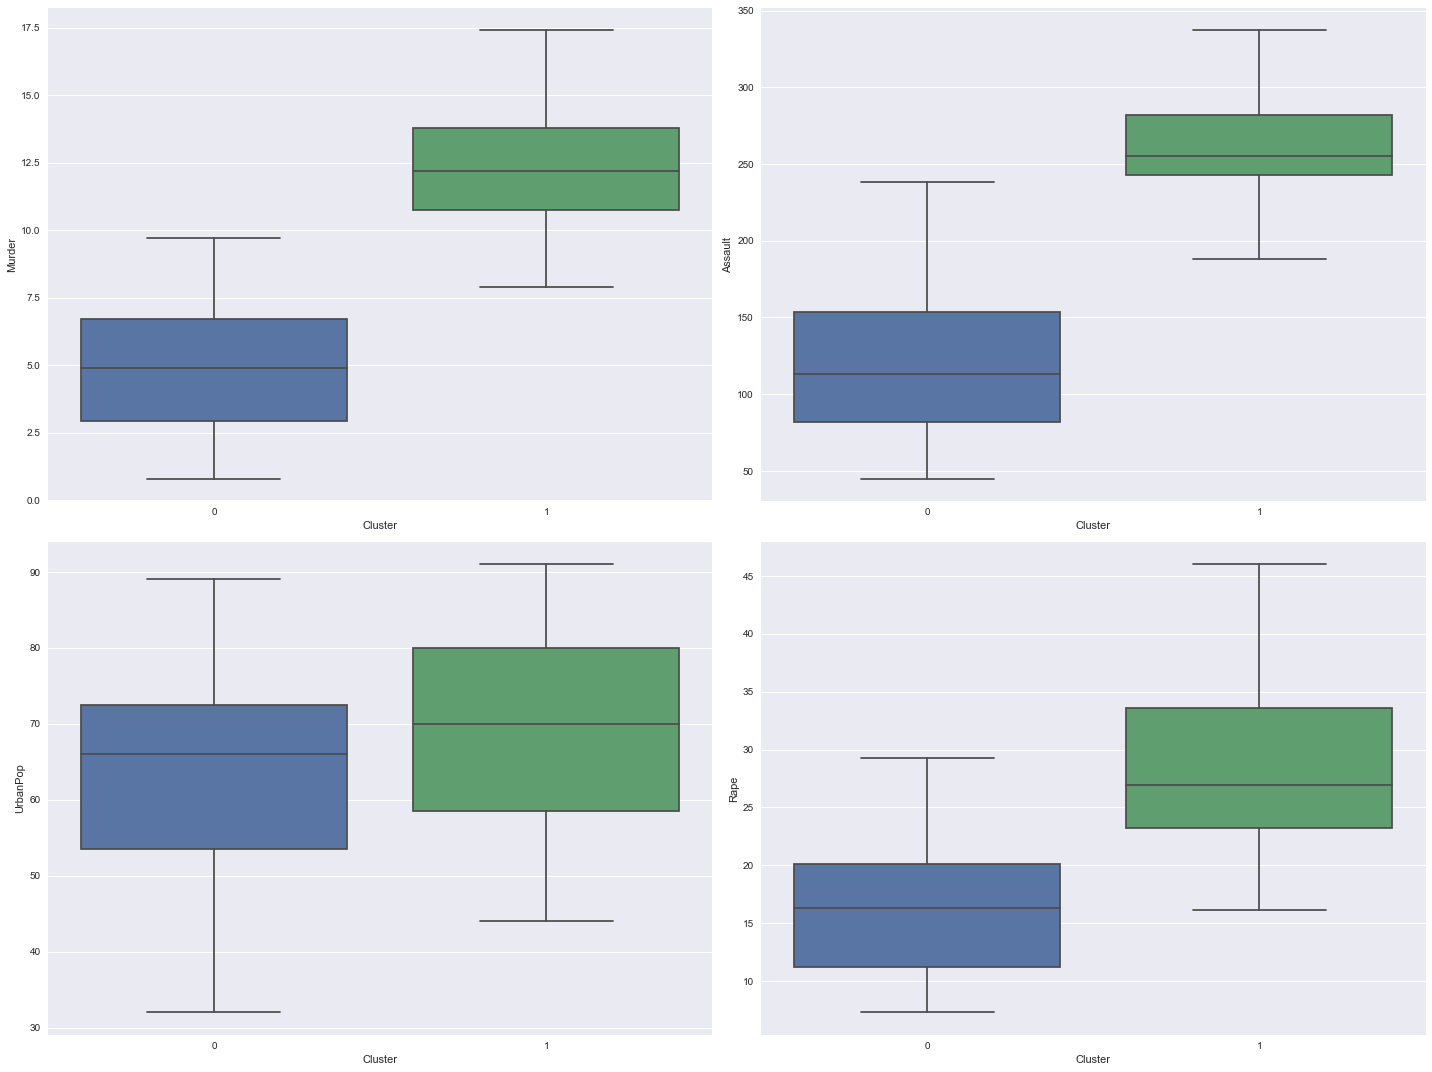

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, col in enumerate(df_scaled.columns):
    sns.boxplot(x='Cluster', y=col, data=df, ax=axes[i // 2, i % 2])
fig.tight_layout()
plt.show()

**Observations:**
1 seems like Danger zone since it has more crime than 0.

In [87]:
df["Cluster"] = df["Cluster"].map({0: "Normal Zone", 1: "Danger Zone"})
df.Cluster.value_counts()

Normal Zone    31
Danger Zone    19
Name: Cluster, dtype: int64

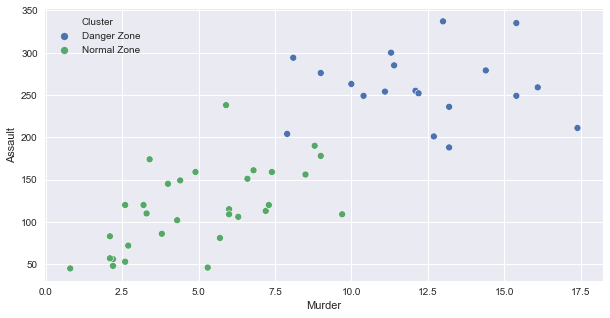

In [88]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Murder', y='Assault', data=df, hue='Cluster')
plt.show()